In [1]:
from jax import numpy as jnp
from jax.scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from stein_pi_thinning.util import generate_dim_diff_pi
from stein_pi_thinning.progress_bar import disable_progress_bar

disable_progress_bar()

In [2]:
def main(kernel="kgm", nits=1_000_000):
    # plt.hist(norm.ppf(jnp.linspace(0.00001, 0.99999, nits)), bins=500, density=True, histtype="step", label=f"$P$")
    sns.kdeplot(norm.ppf(jnp.linspace(0, 1, nits)), label=f"$P$")
    for i in [1, 2, 10]:
        x_q = generate_dim_diff_pi(i, kernel=kernel, nits=nits)
        sns.kdeplot(x_q[:,0], label=f"$\Pi \quad(d={i})$")
        # plt.hist(x_q[:,0], bins=100, density=True, histtype="step", label=f"$\Pi \quad(d={i})$")
    plt.xlim(-3, 3)
    plt.legend()
    plt.savefig(f"{kernel}.pdf", dpi=600)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


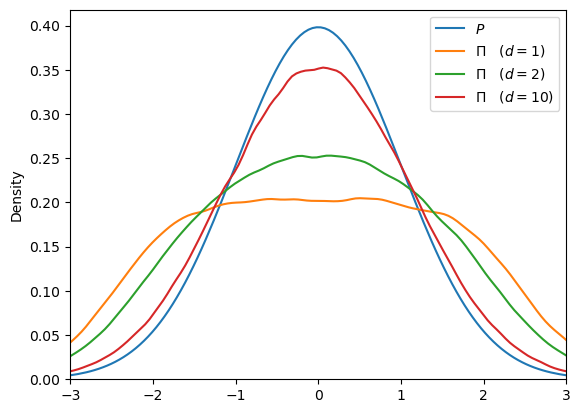

In [3]:
main(kernel="kgm")

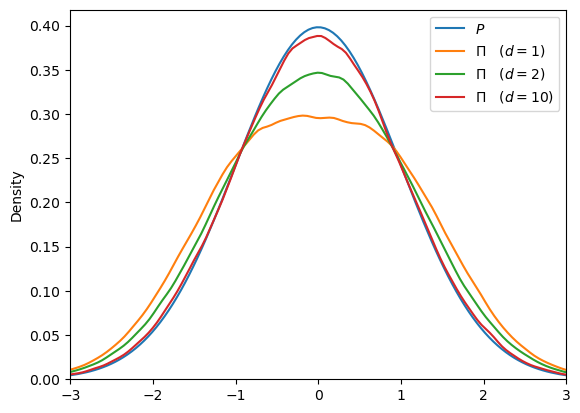

In [4]:
main(kernel="imq")